In this excercise, we will go and recreate this:
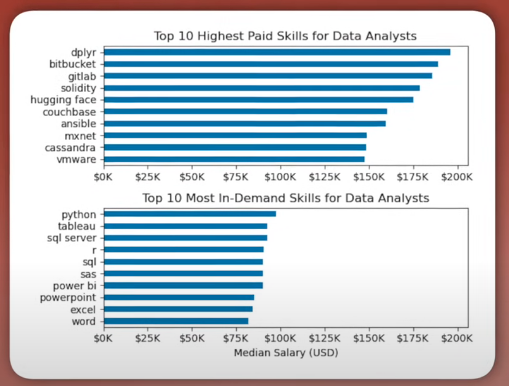

what are the essential skills that you need to have as a data analyst in the US. 
And what other skills that you need to get pay more (specialization)

In [67]:
import pandas as pd
from datasets import load_dataset
import ast

import matplotlib.pyplot as plt

#loading data
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

#data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.describe()
df.info()
df.iloc[0:2]

job = 'Data Analyst'
##Data cleanup
#filter to US jobs
df_US = df[(df.job_country == 'United States') & (df.job_title_short == job)].copy()
#transition the str skills to list 
df_US['job_skills'] = df_US['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

df_explode = df_US.explode('job_skills')
#capitalize the name of the skills 
df_explode['job_skills']=df_explode['job_skills'].str.capitalize()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [68]:
df_skills_median_salary = df_explode.groupby(by='job_skills', as_index=False)['salary_year_avg'].median()


In [69]:
df_skills_summary = df_explode.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    job_count=('job_skills', 'size')
).reset_index()

In [70]:
#df_skills_summary
df_skills_summary.set_index('job_skills',inplace=True)

In [71]:
df_skills_summary

,median_salary,job_count
job_skills,,
Airflow,116250.00,387
Airtable,90000.00,36
Alteryx,106281.25,2045
Angular,107500.00,129
Ansible,159640.00,48
...,...,...
Workfront,75000.00,29
Wrike,75000.00,14
Xamarin,NaN,1


In [72]:
df_skills_median_salary

,job_skills,salary_year_avg
0,Airflow,116250.00
1,Airtable,90000.00
2,Alteryx,106281.25
3,Angular,107500.00
4,Ansible,159640.00
...,...,...
213,Workfront,75000.00
214,Wrike,75000.00
215,Xamarin,NaN
216,Yarn,NaN


In [73]:
top_10_skills = df_skills_summary['job_count'].sort_values(ascending=False).head(10).index.to_list()

In [74]:
top_10_skills

['Sql',
 'Excel',
 'Tableau',
 'Python',
 'Sas',
 'R',
 'Power bi',
 'Word',
 'Powerpoint',
 'Oracle']

<Axes: ylabel='job_skills'>

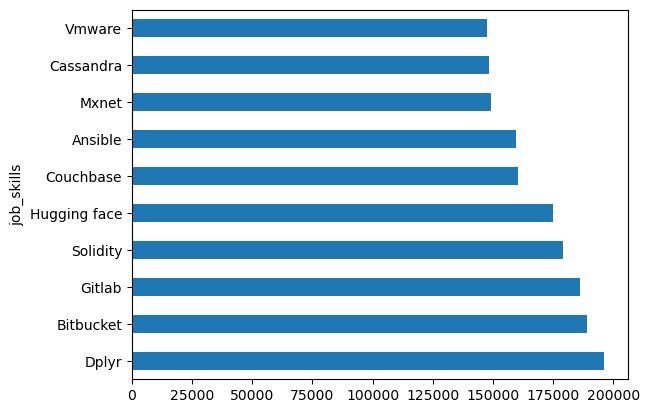

In [75]:
df_skills_summary['median_salary'].sort_values(ascending=False).head(10).plot(kind='barh')

<Axes: ylabel='job_skills'>

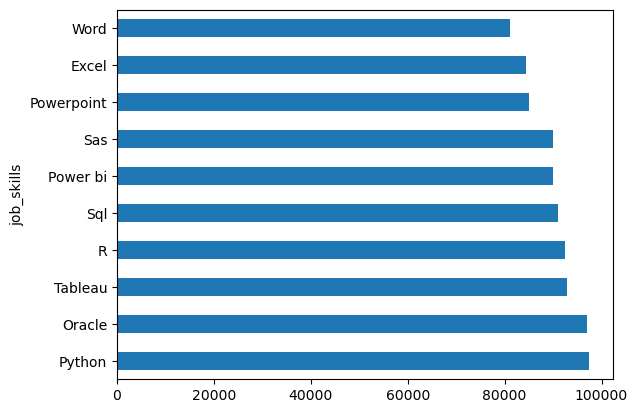

In [76]:
df_skills_summary[df_skills_summary.index.isin(top_10_skills)]['median_salary'].sort_values(ascending=False).plot(kind='barh')

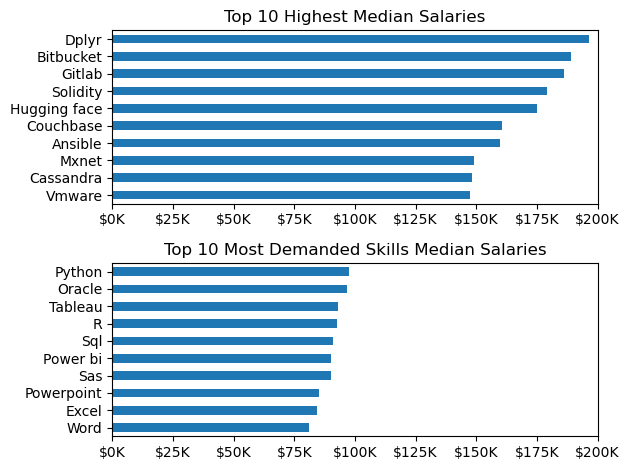

In [77]:
fig, ax = plt.subplots(2,1)
df_skills_summary['median_salary'].sort_values(ascending=False).head(10).plot(kind='barh', ax = ax[0])
ax[0].set_title('Top 10 Highest Median Salaries')
ax[0].set_xlim(0, 200000)
ax[0].invert_yaxis()  # Reverse the y-axis for the first subplot
ax[0].set_ylabel('')  # Remove x-axis label for the first subplot


df_skills_summary[df_skills_summary.index.isin(top_10_skills)]['median_salary'].sort_values(ascending=False).plot(kind='barh', ax=ax[1])
ax[1].set_title('Top 10 Most Demanded Skills Median Salaries')
ax[1].set_xlim(0, 200000)
ax[1].invert_yaxis()  # Reverse the y-axis for the second subplot
ax[1].set_ylabel('')  # Remove x-axis label for the second subplot

#### formating thousands dollars
from matplotlib.ticker import FuncFormatter
# Function to format x-axis labels as USD with 'K' for thousands
def thousands_formatter(x, pos):
    return f'${int(x/1000)}K'
# Apply thousands formatter to both subplots
for axis in ax:
    axis.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
####

# Set layout and show plot
plt.tight_layout()
plt.show()


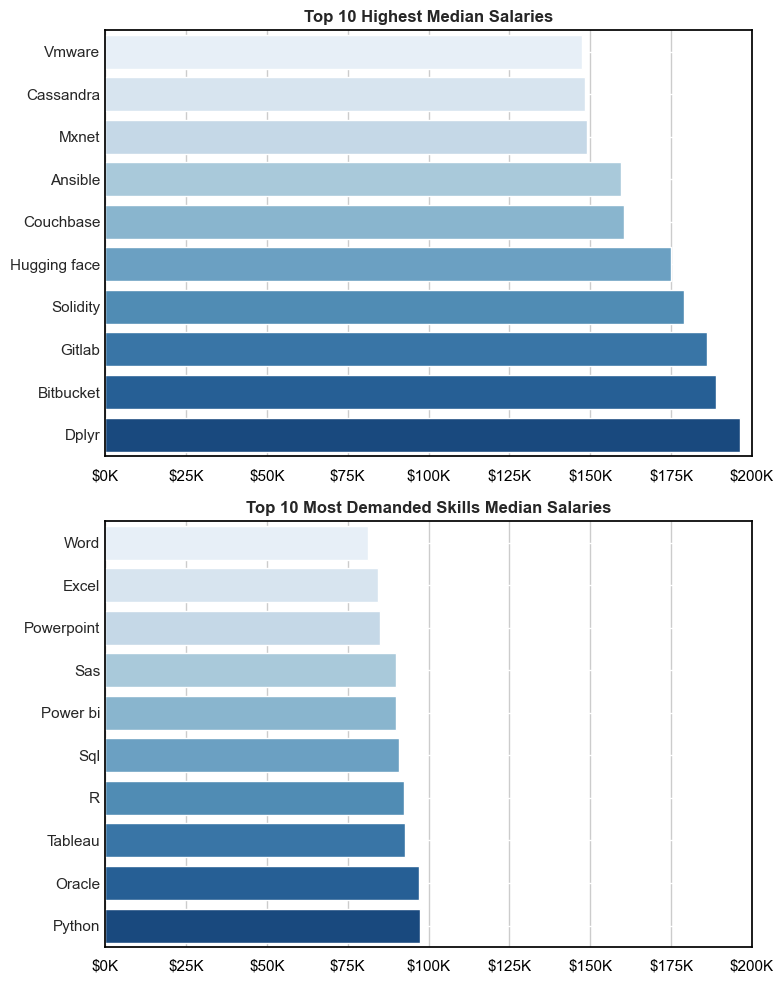

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Set a white background with white grid
sns.set_theme(style="whitegrid")

# Create subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Plot the top 10 highest median salaries in the first subplot
top_10_salaries = df_skills_summary['median_salary'].sort_values(ascending=False).head(10)
sns.barplot(x=top_10_salaries, y=top_10_salaries.index, ax=ax[0], hue=top_10_salaries.index, palette='Blues_r', legend=False)  # Flipped color
ax[0].set_title('Top 10 Highest Median Salaries', fontweight='bold')  # Bold title
ax[0].set_xlim(0, 200000)
ax[0].invert_yaxis()  # Reverse the y-axis for the first subplot
ax[0].set_ylabel('')  # Set y-axis label to empty
ax[0].set_xlabel('')  # Set x-axis label to empty

# Plot the top 10 most demanded skills median salaries in the second subplot
demanded_skills_salaries = df_skills_summary[df_skills_summary.index.isin(top_10_skills)]['median_salary'].sort_values(ascending=False)
sns.barplot(x=demanded_skills_salaries, y=demanded_skills_salaries.index, ax=ax[1], hue=demanded_skills_salaries.index, palette='Blues_r', legend=False)  # Flipped color
ax[1].set_title('Top 10 Most Demanded Skills Median Salaries', fontweight='bold')  # Bold title
ax[1].set_xlim(0, 200000)
ax[1].invert_yaxis()  # Reverse the y-axis for the second subplot
ax[1].set_ylabel('')  # Set y-axis label to empty
ax[1].set_xlabel('')  # Set x-axis label to empty

# Set grid lines to white
for axis in ax:
    axis.yaxis.grid(color='white')  # Set y-axis grid lines to white
    axis.spines['top'].set_color('black')  # Set the top spine to black
    axis.spines['right'].set_color('black')  # Set the right spine to black
    axis.spines['left'].set_color('black')  # Set the left spine to black
    axis.spines['bottom'].set_color('black')  # Set the bottom spine to black
    
    # Remove tick marks from y-axis
    axis.tick_params(axis='y', which='both', length=0)  # Remove y-axis tick marks
    axis.tick_params(axis='x', colors='black')  # Set x-axis tick marks to black

# Function to format x-axis labels as USD with 'K' for thousands
def thousands_formatter(x, pos):
    return f'${int(x/1000)}K'

# Apply thousands formatter to both subplots
for axis in ax:
    axis.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Set layout and show plot
plt.tight_layout()
plt.show()
